## Using Logistic Regression to Predict Titanic Survivors

In [195]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
# Load data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [197]:
# Merge Train and Test data, creating a variable to denot which rows belong to which dataset
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
titanic_data = pd.concat([train,test])

In [198]:
#titanic_data.head()
#titanic_data.index
#titanic_data.columns
#titanic_data.info()
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


<AxesSubplot: xlabel='Survived', ylabel='count'>

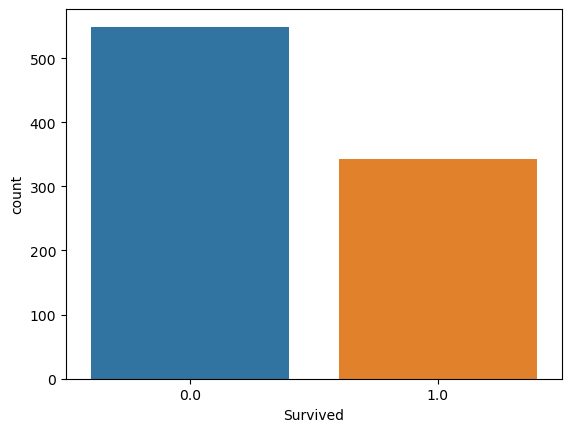

In [199]:
# Countplot
sns.countplot(x='Survived',data=titanic_data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

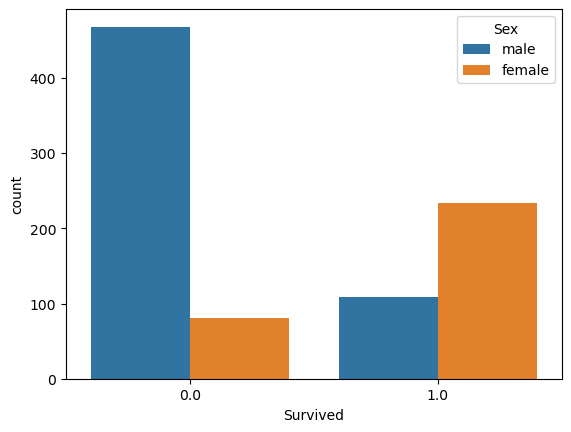

In [200]:
# Clustered Countplot
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

In [201]:
print(titanic_data.isna().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64


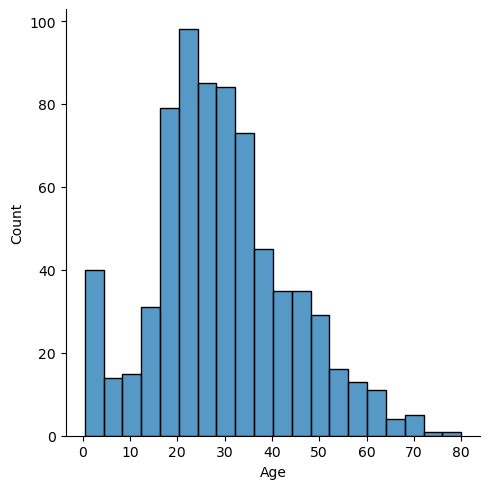

In [202]:
sns.displot(x='Age',data=train)

In [203]:
# Impute missing age values using median
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)
# Impute missing fare values using median
titanic_data['Fare'].fillna(titanic_data['Fare'].median(),inplace=True)

In [204]:
# Create Dummy Variable for Sex
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)
titanic_data['Gender']=gender

In [205]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Gender
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,1


In [206]:
# Drop unrequired columns
titanic_data.drop(['Name','Sex','Ticket','Embarked','Cabin'],axis=1)
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test', 'Gender'],
      dtype='object')


In [207]:
new_train = titanic_data[titanic_data['train_test']==1]
new_test = titanic_data[titanic_data['train_test']==0]

In [208]:
# Seperate Dependent and Independent Variables
X=new_train[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=new_train['Survived']
X_testing=new_test[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y_testing=new_test['Survived']

In [209]:
# Import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [210]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [211]:
# Fit a Logistic Regression Model and calculate accuracy against test data
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
predictions = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7932960893854749

In [213]:
# Create Submission File

#set ids as PassengerId and predict survival 
ids = X_testing['PassengerId']
predictions = logreg.predict(X_testing)
# X_testing['Survived'] = logreg.predict(X_testing)
# X_testing

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output['Survived'] = output['Survived'].astype('int')
output.to_csv('submission.csv', index=False)
#output